# Ground Instances notebook

In [24]:
import numpy as np
import pandas as pd
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm

Load data

In [3]:
project_dir = '/Users/Gal/Downloads/rquestions'
ans = pd.read_csv(project_dir + '/Answers.csv')
qus = pd.read_csv(project_dir + '/Questions.csv')
tags = pd.read_csv(project_dir + '/Tags.csv')

In [4]:
ans.head(100)

,Id,OwnerUserId,CreationDate,ParentId,Score,IsAcceptedAnswer,Body
0,79741,3259.0,2008-09-17T03:43:22Z,79709,-1,False,<p>It's tough to say definitively without know...
1,79768,6043.0,2008-09-17T03:48:29Z,79709,9,False,<p>use variables in the outer function instead...
2,79779,8002.0,2008-09-17T03:49:36Z,79709,0,False,<p>Third approach: inner function returns a re...
3,79788,NaN,2008-09-17T03:51:30Z,79709,4,False,<p>It's not going to make much difference to m...
4,79827,14257.0,2008-09-17T03:58:26Z,79709,1,False,"<p>I'm not sure I understand the question, but..."
5,79893,14928.0,2008-09-17T04:11:08Z,79709,6,False,"<p>Remember your Knuth. ""Premature optimizati..."
6,83162,15842.0,2008-09-17T13:27:17Z,77434,70,False,<p>If you're looking for something as nice as ...
7,83222,1428.0,2008-09-17T13:32:45Z,77434,236,False,<p>I use the <code>tail()</code> function:</p>...
8,86804,NaN,2008-09-17T19:39:37Z,79709,1,False,"<p>FYI, here's a full sample toy solution that..."
9,95598,1179.0,2008-09-18T18:49:09Z,95007,5,False,<p>There are various ways of computing quantil...


In [5]:
qus.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,77434,14008.0,2008-09-16T21:40:29Z,171,How to access the last value in a vector?,<p>Suppose I have a vector that is nested in a...
1,79709,NaN,2008-09-17T03:39:16Z,3,Worse sin: side effects or passing massive obj...,<p>I have a function inside a loop inside a fu...
2,95007,15842.0,2008-09-18T17:59:19Z,56,Explain the quantile() function in R,<p>I've been mystified by the R quantile funct...
3,103312,NaN,2008-09-19T16:09:26Z,4,How to test for the EOF flag in R?,<p>How can I test for the <code>EOF</code> fla...
4,255697,1941213.0,2008-11-01T15:48:30Z,4,Is there an R package for learning a Dirichlet...,<p>I'm looking for a an <code>R</code> package...


In [6]:
tags.head()

,Id,Tag
0,77434,vector
1,79709,memory
2,79709,function
3,79709,global-variables
4,79709,side-effects


In [5]:
# qus - ans Graph
G = nx.from_pandas_dataframe(ans, "Id", "ParentId", ["Score", "OwnerUserId"], nx.DiGraph())
G.size(), G.number_of_edges(), G.number_of_nodes(), G.selfloop_edges()

(250788, 250788, 410125, [])

In [6]:
gs = list(nx.weakly_connected_component_subgraphs(G))
lens = [len(x) for x in gs]
giants = [x for x in gs if len(x) == 27]

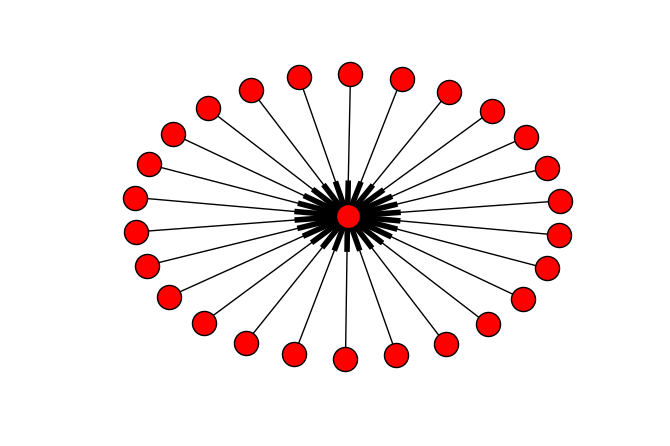

In [7]:
%matplotlib inline
nx.draw(giants[0])

In [ ]:
# create users graph
user_graph = nx.DiGraph()
for index, row in ans.iterrows():
    tmp_id = row["Id"]
    qus_rows = qus[qus["Id"] == tmp_id]
    for i, row2 in qus_rows.iterrows():
        user_graph.add_edge(row["OwnerUserId"], row2["OwnerUserId"])


In [16]:
%matplotlib inline
gs = list(nx.weakly_connected_component_subgraphs(G))
len(gs), user_graph.size()
large_comp = [x for x in gs if len(x) > 20]

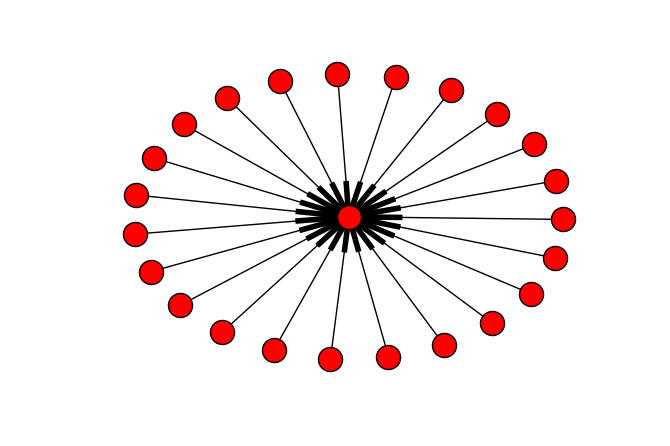

In [22]:
%matplotlib inline
nx.draw(large_comp[4])